# Experiment description
## Hypothesis: 
Seven days periodicity can be observed on localidades with higher predicatbility index values, meanwhile this period is not observed on localidades with lower values.

Periodicity value on 3.5 can be observed on localidades with medium predicability level.
## Method: 
Fourier analysis to identify periodicity on time series signals. Time series to analyze: 
- Higher predictability: Ciudad Bolívar, Bosa, Usme, Kennedy y Rafael Uribe Uribe
- Lower predictability: Teusaquillo, Martires, Chapinero y Barrios Unidos.

## Built-in methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import calendar
import scipy as sp
import scipy.fftpack
from scipy.signal import find_peaks

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [2]:
def set_initial_dataset_day(df_by_date,name_day):
    df_by_date = df_by_date.reset_index()
    df_by_date['day_of_week'] = df_by_date['date'].dt.day_name()
    monday_idx = df_by_date.index[df_by_date['day_of_week'] == name_day].tolist()[0]
    df_by_date = df_by_date[monday_idx:].set_index('date').drop(['day_of_week'],axis=1)
    return df_by_date

In [3]:
def low_pass_filter(signal, fc =0.04, b =0.08):
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    s = signal
    s = s - np.nanmean(s)
    filtered_signal = np.convolve(s, sinc_func)
    return filtered_signal

In [4]:
def fourier_analysis(signal):
    time = range(len(signal))
    fftdata = np.fft.fft(signal)
    fftdatafreq = np.zeros((len(signal)))

    for i in range(len(fftdata)):
        fftdatafreq[i] = abs(fftdata[i].real)

    #plt.ylabel("Amplitude")
    #plt.xlabel("Frequency")
    
    unilateral_fft = fftdatafreq[0:len(fftdatafreq) // 2]
    #plt.plot(time[1:len(fftdatafreq) // 2], unilateral_fft[1:])
    return unilateral_fft

In [5]:
def get_max_frequencies(unilateral_fft_signal,fs_original_signal):
    max_freq = unilateral_fft_signal.argsort()[-10:][::-1]
    print('Max frequencies: ',max_freq)
    periodicity = fs_original_signal/max_freq
    print('Periods: ', periodicity)

In [7]:
def get_frequency_peaks(unilateral_fft, custom_distance):
    peaks, _ = find_peaks(unilateral_fft, distance = custom_distance)
    return peaks

In [8]:
def get_peaks_magnitude(unilateral_fft, peaks_location_array):
    peaks_magnitude = []
    for peak in peaks_location_array:
        magnitude = round(unilateral_fft[peak],2)
        peaks_magnitude.append(magnitude)
    return peaks_magnitude

In [9]:
def get_peaks_period(array_frequency_peaks,fs):
    peaks_period = []
    for peak in array_frequency_peaks:
        period = round((fs/peak),2)
        peaks_period.append(period)
    return peaks_period

In [10]:
def get_periods_by_peak(peaks,n_periods):
    period_values_array = {}
    for period in range(n_periods):
        period_values_array[period]=[]
        for peak in peaks:
            current_period = peaks[peak]['periods'][period]
            period_values_array[period].append(current_period)

    return period_values_array

In [76]:
def plot_fft_period_axis(signal_time_domain,unilateral_fft):
    fs = len(signal_time_domain)
    samples_fft = len(unilateral_fft)
    inv=unilateral_fft[1:][::-1]
    #inv = low_pass_filter(inv, fc =0.08, b =0.08)
    #samples_inv = len(inv) +1
    points_x = np.arange(samples_fft)
    period = fs/(samples_fft - points_x[1:])
    inv = inv/inv.max()
    
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
    ax.plot(period,inv)
    plt.ylabel("Amplitude")
    plt.xlabel("Period (in days)")
    plt.axis([0, 15, 0, 1.2])
    plt.show()
    

## Data

In [11]:
data_location = '/Users/anamaria/Desktop/dev/security_project/datasets/verify_enrich_nuse_29112019.csv'
df_input = pd.read_csv(data_location,delimiter=",")

In [12]:
df_input['date']=pd.to_datetime(df_input['FECHA'])
df_by_date = pd.DataFrame(df_input.groupby(['date','LOCALIDAD']).size(),columns=["total_eventos"])
df_by_date = df_by_date.reset_index().set_index('date')

In [13]:
df_by_date.LOCALIDAD.unique()

array(['ANTONIO NARIÑO', 'BARRIOS UNIDOS', 'BOSA', 'CANDELARIA',
       'CHAPINERO', 'CIUDAD BOLIVAR', 'ENGATIVA', 'FONTIBON', 'KENNEDY',
       'LOS MARTIRES', 'PUENTE ARANDA', 'RAFAEL URIBE URIBE',
       'SAN CRISTOBAL', 'SANTA FE', 'SUBA', 'TEUSAQUILLO', 'TUNJUELITO',
       'USAQUEN', 'USME', 'SIN LOCALIZACION'], dtype=object)

# Results
## Experiment localidades with high predictability

In [78]:
localidadesList = ['CIUDAD BOLIVAR','BOSA','USME','KENNEDY','RAFAEL URIBE URIBE']

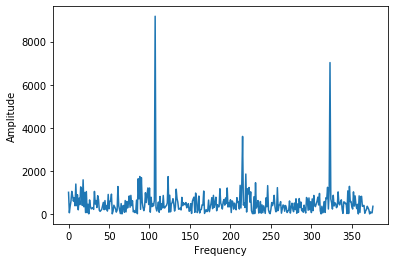

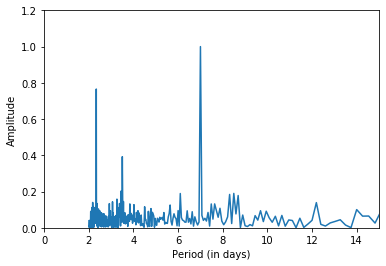

CIUDAD BOLIVAR: {'frequency': [10, 108, 216, 324], 'periods': [75.6, 7.0, 3.5, 2.33], 'values': [1391.26, 9177.93, 3601.73, 7028.2]}


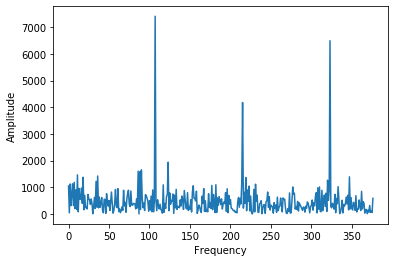

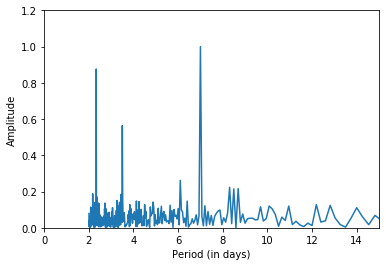

BOSA: {'frequency': [12, 108, 216, 324], 'periods': [63.0, 7.0, 3.5, 2.33], 'values': [1465.63, 7411.24, 4178.04, 6492.7]}


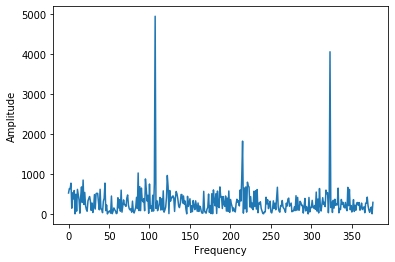

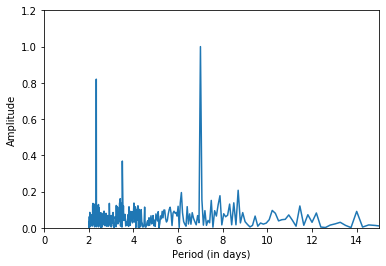

USME: {'frequency': [4, 108, 216, 324], 'periods': [189.0, 7.0, 3.5, 2.33], 'values': [769.44, 4942.92, 1820.59, 4054.83]}


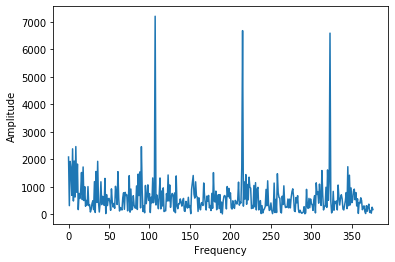

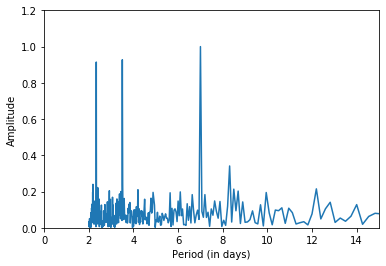

KENNEDY: {'frequency': [10, 108, 216, 324], 'periods': [75.6, 7.0, 3.5, 2.33], 'values': [2460.91, 7204.17, 6680.66, 6589.51]}


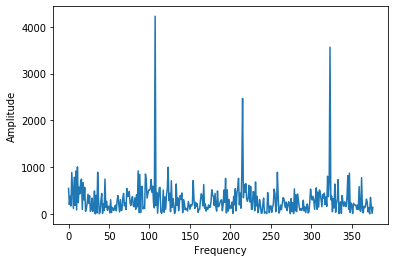

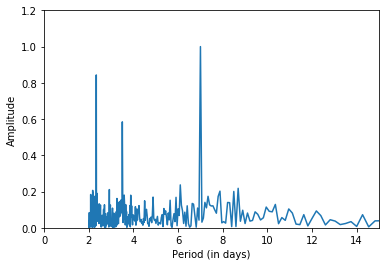

RAFAEL URIBE URIBE: {'frequency': [12, 108, 216, 324], 'periods': [63.0, 7.0, 3.5, 2.33], 'values': [1005.89, 4223.58, 2469.05, 3562.53]}


In [79]:
lT = 756 #keep number of samples from predictiblity experiment(04)
peaks={}

for localidad in localidadesList:
    df_by_localidad = df_by_date[df_by_date['LOCALIDAD'] == localidad]
    
    #Make sure dataset starts on Monday for the experiment
    df_by_localidad = set_initial_dataset_day(df_by_localidad,'Monday')

    #Make sure dataset include consecutive dates in period
    idx = pd.date_range(min(df_by_localidad.reset_index().date), max(df_by_localidad.reset_index().date))
    df_by_localidad = df_by_localidad.reindex(idx, fill_value=0)
    
    df_localidad_values = pd.Series(df_by_localidad['total_eventos']).values
    df_localidad_values = df_localidad_values[0:lT]
    
    fft_localidad = fourier_analysis(df_localidad_values)
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
    ax.plot(fft_localidad[1:])
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")
    plt.show()
    
    plot_fft_period_axis(df_localidad_values,fft_localidad)
    
    peaks[localidad]={}
    peak_points = get_frequency_peaks(fft_localidad, 90)
    peak_values = get_peaks_magnitude(fft_localidad,peak_points)
    peak_periods = get_peaks_period(list(peak_points),len(df_localidad_values))
    peaks[localidad]['frequency']=list(peak_points)
    peaks[localidad]['periods']=peak_periods
    peaks[localidad]['values']=peak_values   
    print(localidad+': '+str(peaks[localidad]))

## Experiment localidades with lower predictability values

In [80]:
localidadesList = ['TEUSAQUILLO','LOS MARTIRES','CHAPINERO','BARRIOS UNIDOS']

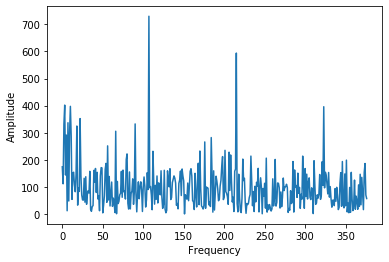

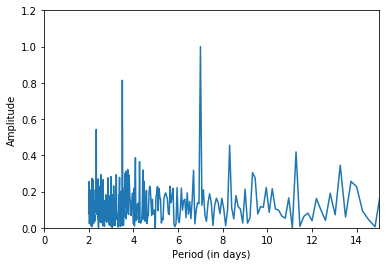

TEUSAQUILLO: {'frequency': [4, 108, 216, 324], 'periods': [189.0, 7.0, 3.5, 2.33], 'values': [401.97, 729.65, 593.85, 396.0]}


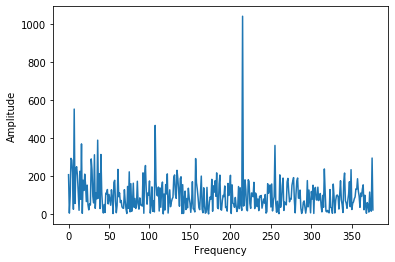

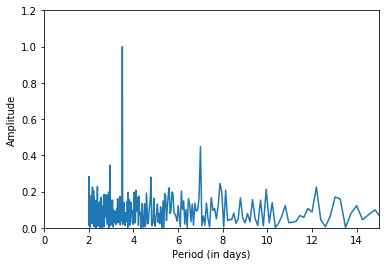

LOS MARTIRES: {'frequency': [8, 108, 216, 376], 'periods': [94.5, 7.0, 3.5, 2.01], 'values': [552.21, 466.1, 1040.95, 294.41]}


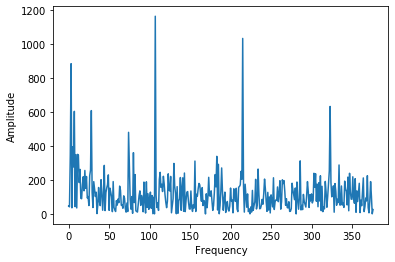

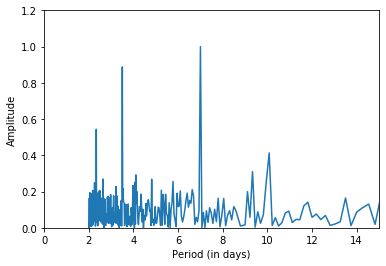

CHAPINERO: {'frequency': [4, 108, 216, 324], 'periods': [189.0, 7.0, 3.5, 2.33], 'values': [885.18, 1164.54, 1033.98, 633.48]}


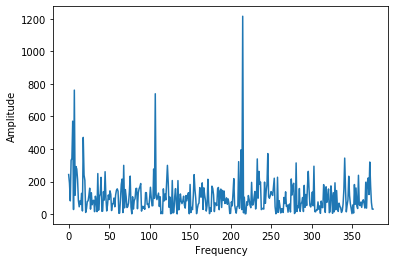

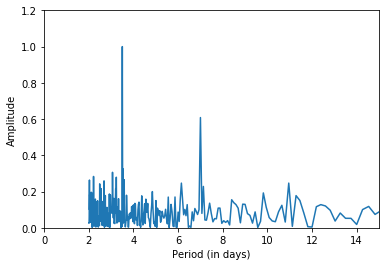

BARRIOS UNIDOS: {'frequency': [8, 108, 216, 342], 'periods': [94.5, 7.0, 3.5, 2.21], 'values': [761.76, 739.35, 1215.24, 344.34]}


In [81]:
lT = 756 #keep number of samples from predictiblity experiment(04)
peaks={}

for localidad in localidadesList:
    df_by_localidad = df_by_date[df_by_date['LOCALIDAD'] == localidad]
    
    #Make sure dataset starts on Monday for the experiment
    df_by_localidad = set_initial_dataset_day(df_by_localidad,'Monday')

    #Make sure dataset include consecutive dates in period
    idx = pd.date_range(min(df_by_localidad.reset_index().date), max(df_by_localidad.reset_index().date))
    df_by_localidad = df_by_localidad.reindex(idx, fill_value=0)
    
    df_localidad_values = pd.Series(df_by_localidad['total_eventos']).values
    df_localidad_values = df_localidad_values[0:lT]
    
    fft_localidad = fourier_analysis(df_localidad_values)
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True)
    ax.plot(fft_localidad[1:])
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")
    plt.show()
    
    plot_fft_period_axis(df_localidad_values,fft_localidad)
    
    peaks[localidad]={}
    peak_points = get_frequency_peaks(fft_localidad, 90)
    peak_values = get_peaks_magnitude(fft_localidad,peak_points)
    peak_periods = get_peaks_period(list(peak_points),len(df_localidad_values))
    peaks[localidad]['frequency']=list(peak_points)
    peaks[localidad]['periods']=peak_periods
    peaks[localidad]['values']=peak_values   
    print(localidad+': '+str(peaks[localidad]))